EDA: consistira na análise univariada e bivariada, e as conclusões dessas auxiliaram no pré-processamento dos dados que esta mais ao fim desse notebook logo após o fim da análise exploratória de dados
................................................................................................................................................................................................................................................................

ANÁLISE UNIVARIADA:
Nessa etapa analisarei o comportamento de cada variável, procurando identificar padrões e possíveis problemas a serem corrigidos nas estapas de pré-processamento

In [18]:
#primeiro importamos o dataset
import pandas as pd
df = pd.read_csv("../DataSet/data.csv", sep=";")

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [19]:
# Cálculo do Coeficiente de Variação (CV) apenas para variáveis numéricas
num_df = df.select_dtypes(include=['number'])

# Calcula o CV (std / mean)
cv = (num_df.std() / num_df.mean()).sort_values(ascending=False)

# Cria DataFrame com o CV e a interpretação
cv_df = pd.DataFrame({
    'CV': cv,
})

# Função para classificar cada variável conforme a tabela que você definiu
def interpretar_cv(valor):
    if valor < 0.15:
        return 'Baixa — valores concentrados, pouca variação'
    elif valor < 0.30:
        return 'Moderada — variação normal, natural'
    elif valor < 1.00:
        return 'Alta — dados espalhados, possível assimetria ou outliers'
    else:
        return 'Extremamente alta — provável presença de outliers ou escala muito ampla'

# Aplica a função a cada linha
cv_df['Interpretação'] = cv_df['CV'].apply(interpretar_cv)

# Converte o CV para porcentagem com 2 casas decimais
cv_df['CV (%)'] = (cv_df['CV'] * 100).round(2)

# Reorganiza e exibe
cv_df = cv_df[['CV (%)', 'Interpretação']]
print("Coeficiente de Variação (CV) por variável:")
display(cv_df)




Coeficiente de Variação (CV) por variável:


,CV (%),Interpretação
GDP,115295.00,Extremamente alta — provável presença de outli...
Educational special needs,926.09,Extremamente alta — provável presença de outli...
International,626.32,Extremamente alta — provável presença de outli...
Curricular units 1st sem (without evaluations),501.88,Extremamente alta — provável presença de outli...
Curricular units 2nd sem (without evaluations),501.46,Extremamente alta — provável presença de outli...
Nacionality,369.13,Extremamente alta — provável presença de outli...
Curricular units 2nd sem (credited),354.09,Extremamente alta — provável presença de outli...
Curricular units 1st sem (credited),332.47,Extremamente alta — provável presença de outli...
Debtor,279.23,Extremamente alta — provável presença de outli...
Mother's occupation,241.02,Extremamente alta — provável presença de outli...


In [20]:
import pandas as pd
import numpy as np

# Limpa os nomes das colunas de espaços/tabulações extras nas bordas
df.columns = df.columns.str.strip()


# Seleciona apenas as colunas numéricas (exclui 'Target')
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Target'], errors='ignore')

# Calcula média, mediana e diferença percentual
assimetria = pd.DataFrame({
    'Média': num_cols.mean(),
    'Mediana': num_cols.median()
})

# Diferença percentual entre média e mediana
assimetria['Diferença (%)'] = ((assimetria['Média'] - assimetria['Mediana']).abs() / assimetria['Média']) * 100

# Função para classificar a assimetria
def classificar_assimetria(row):
    diff = row['Diferença (%)']
    if diff < 10:
        return 'Simétrica (baixa/nenhuma)'
    elif diff < 20:
        if row['Média'] > row['Mediana']:
            return 'Assimétrica à direita (moderada)'
        else:
            return 'Assimétrica à esquerda (moderada)'
    else:
        return 'Fortemente assimétrica (alta)'

# Aplica a classificação
assimetria['Classificação'] = assimetria.apply(classificar_assimetria, axis=1)

# Organiza colunas e arredonda valores
assimetria = assimetria[['Média', 'Mediana', 'Diferença (%)', 'Classificação']]
assimetria['Diferença (%)'] = assimetria['Diferença (%)'].round(2)

# Mostra o resultado ordenado por diferença decrescente
display(assimetria.sort_values(by='Diferença (%)', ascending=False))


,Média,Mediana,Diferença (%),Classificação
GDP,0.001969,0.320000,16153.50,Fortemente assimétrica (alta)
Educational special needs,0.011528,0.000000,100.00,Fortemente assimétrica (alta)
Curricular units 2nd sem (without evaluations),0.150316,0.000000,100.00,Fortemente assimétrica (alta)
Curricular units 2nd sem (credited),0.541817,0.000000,100.00,Fortemente assimétrica (alta)
Curricular units 1st sem (without evaluations),0.137658,0.000000,100.00,Fortemente assimétrica (alta)
Curricular units 1st sem (credited),0.709991,0.000000,100.00,Fortemente assimétrica (alta)
International,0.024864,0.000000,100.00,Fortemente assimétrica (alta)
Gender,0.351718,0.000000,100.00,Fortemente assimétrica (alta)
Debtor,0.113698,0.000000,100.00,Fortemente assimétrica (alta)
Scholarship holder,0.248418,0.000000,100.00,Fortemente assimétrica (alta)


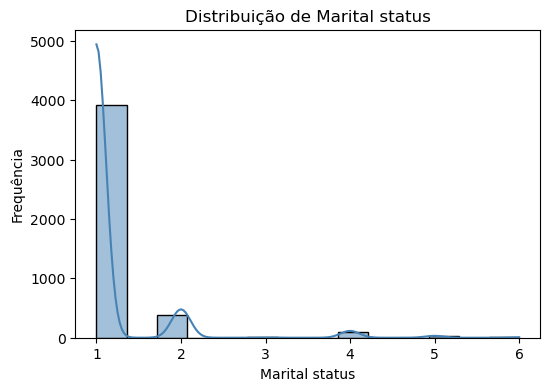

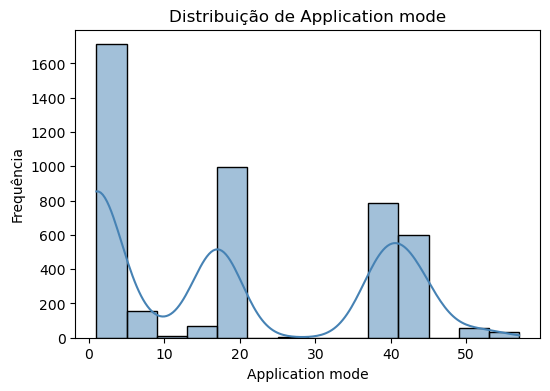

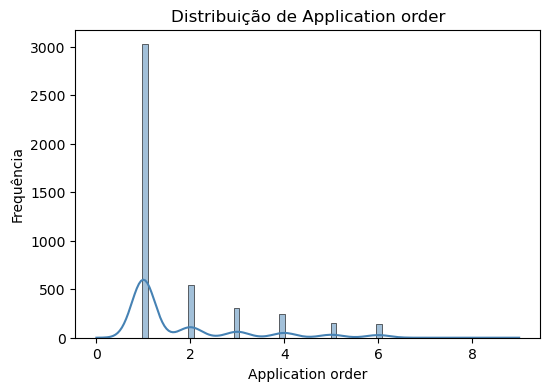

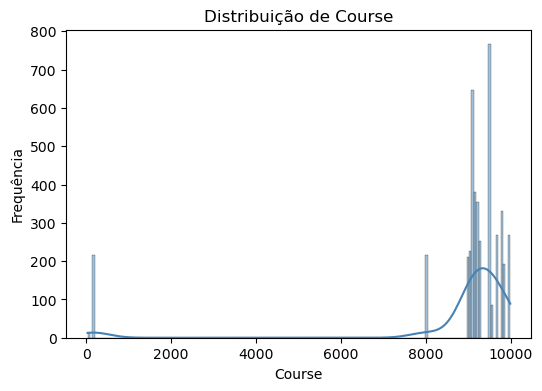

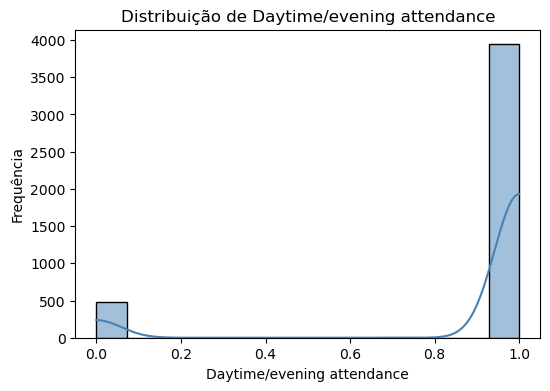

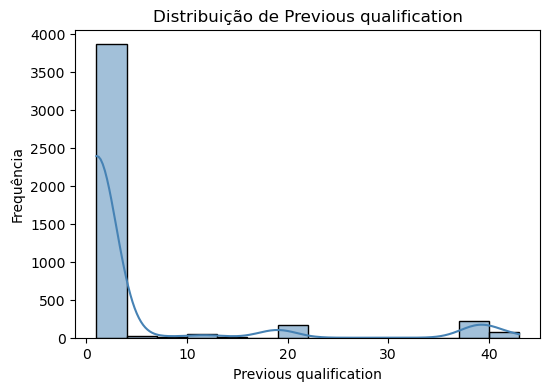

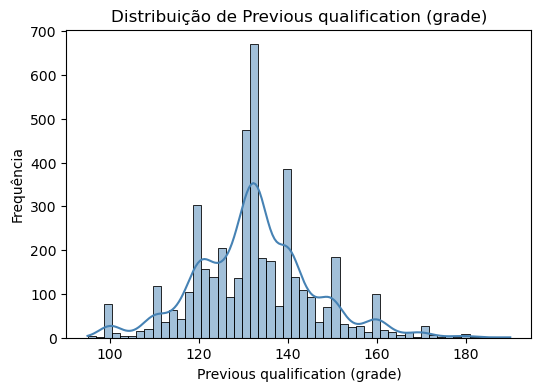

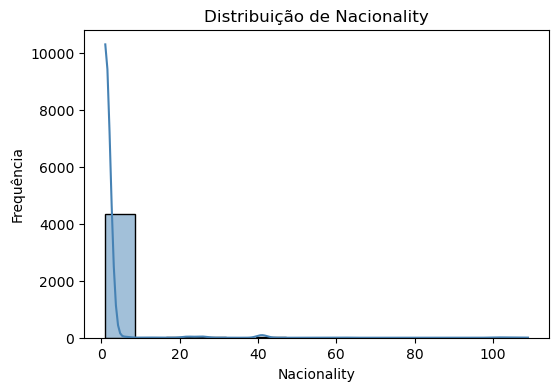

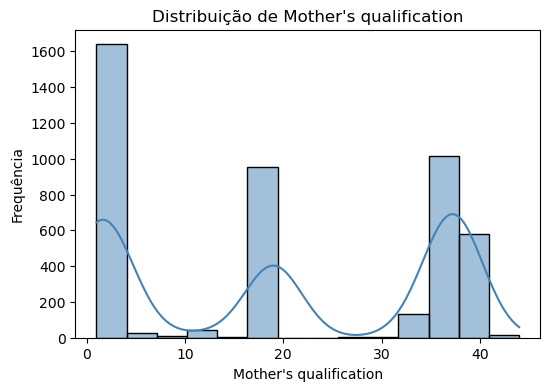

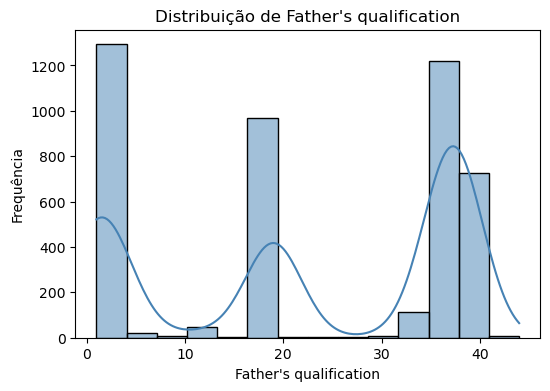

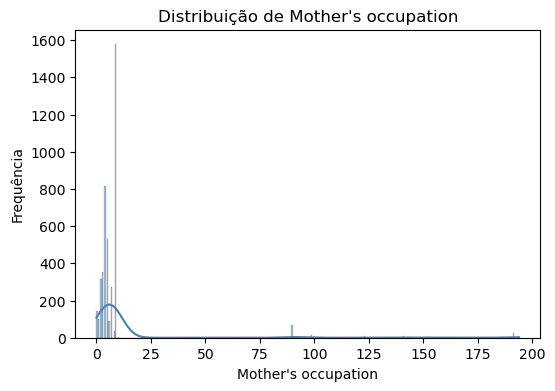

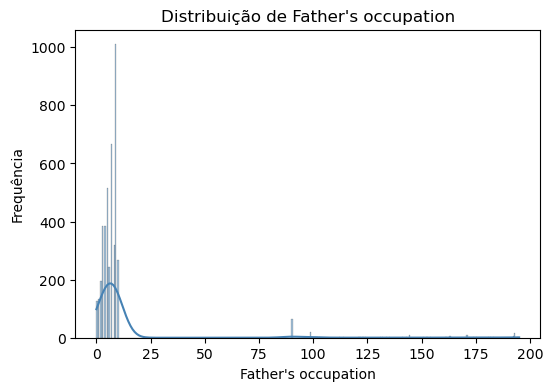

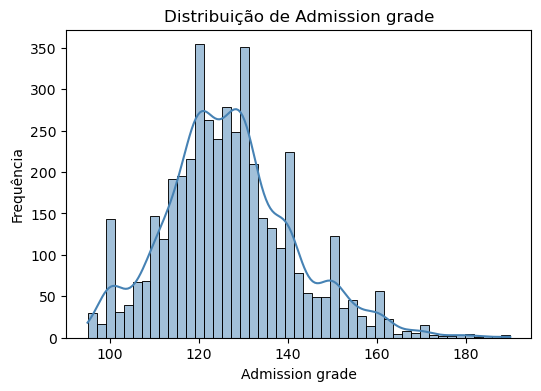

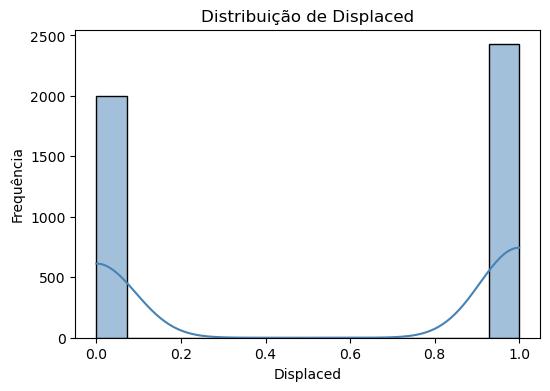

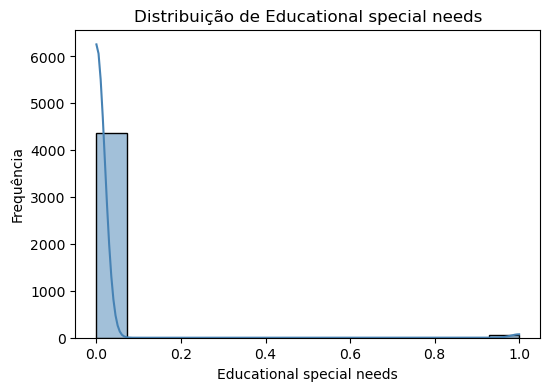

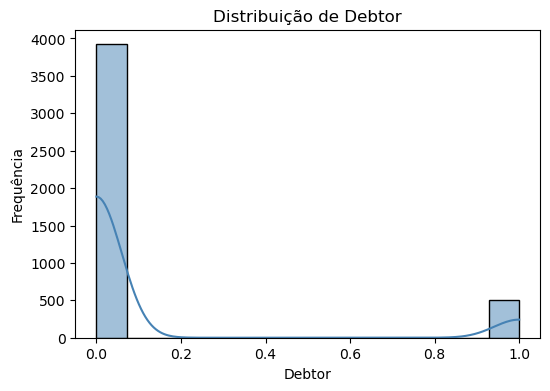

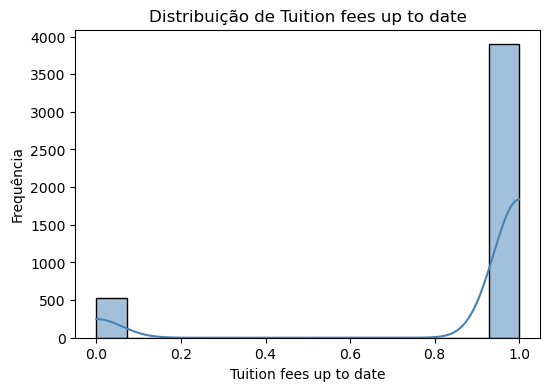

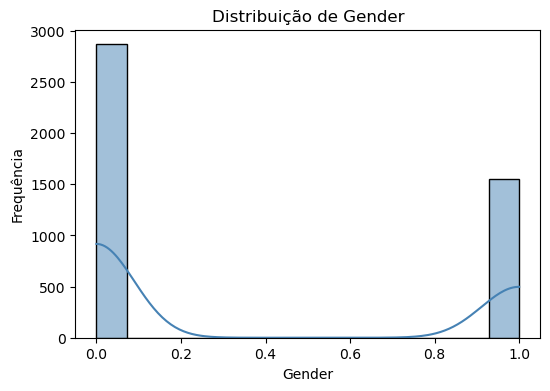

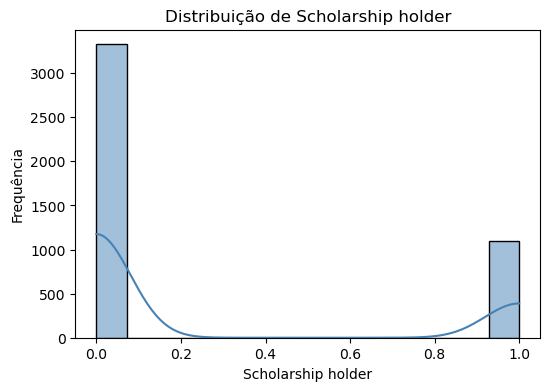

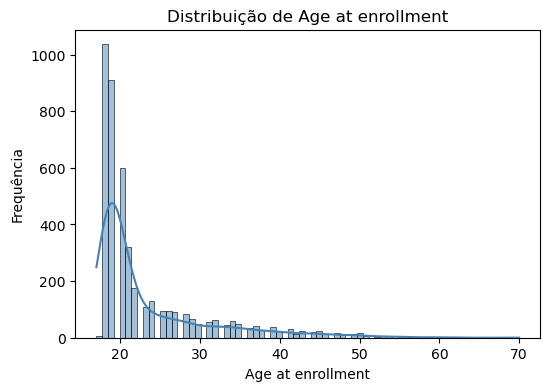

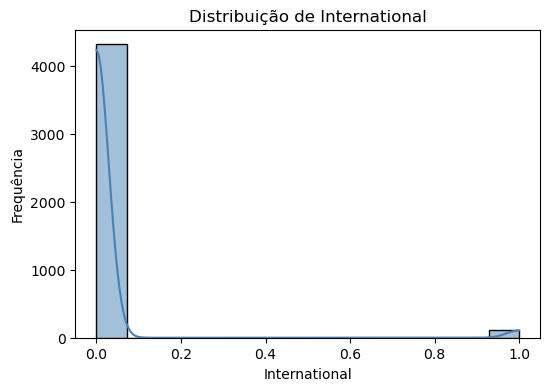

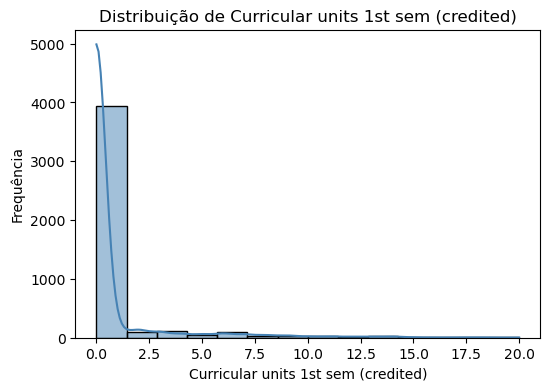

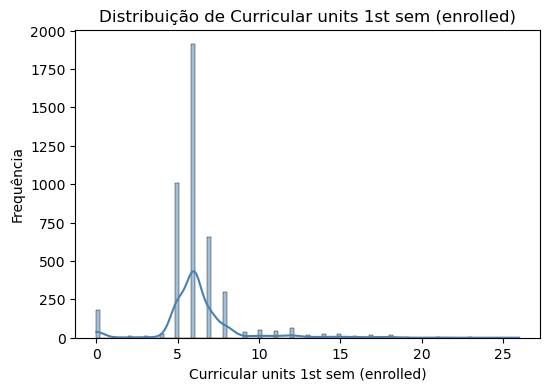

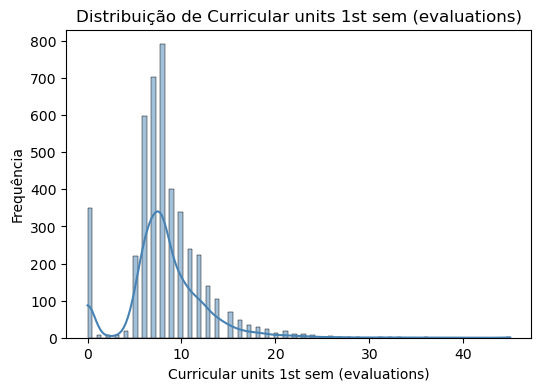

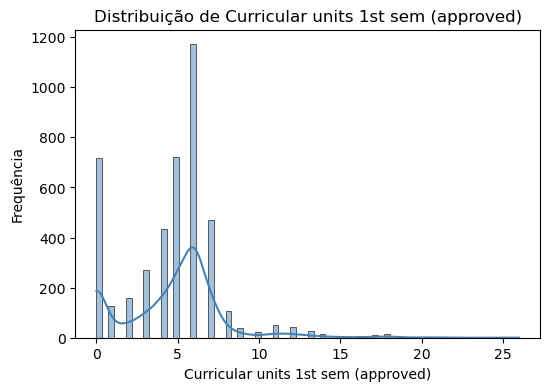

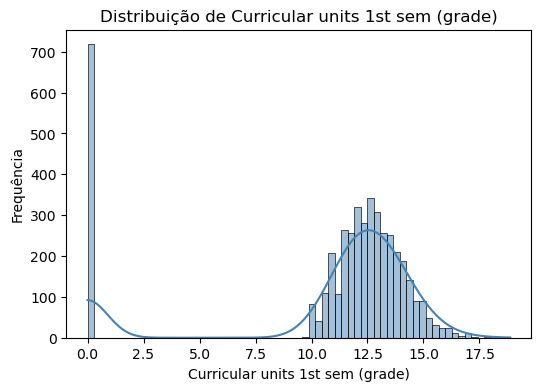

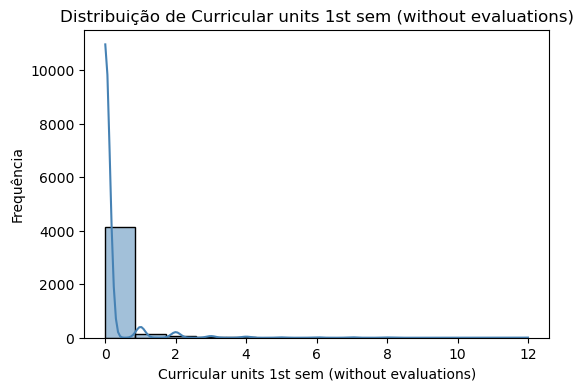

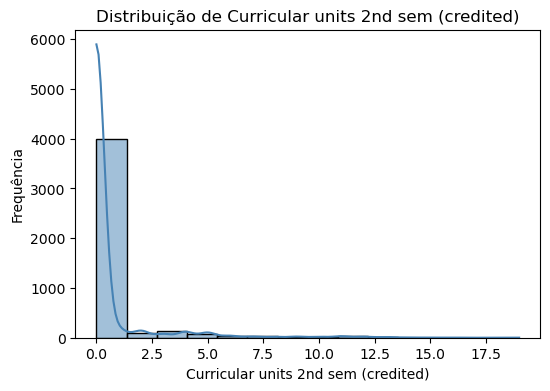

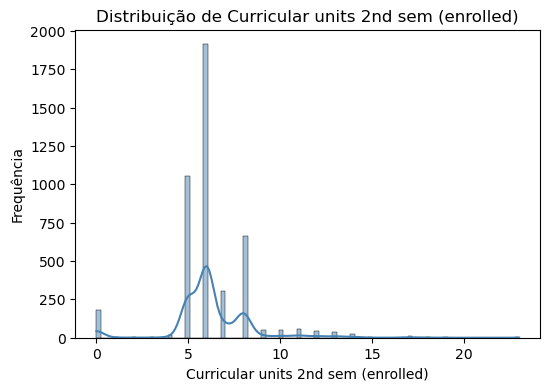

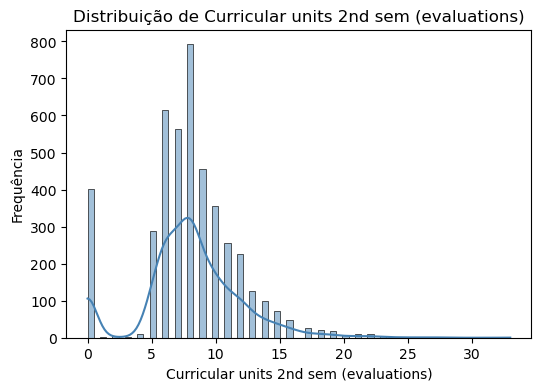

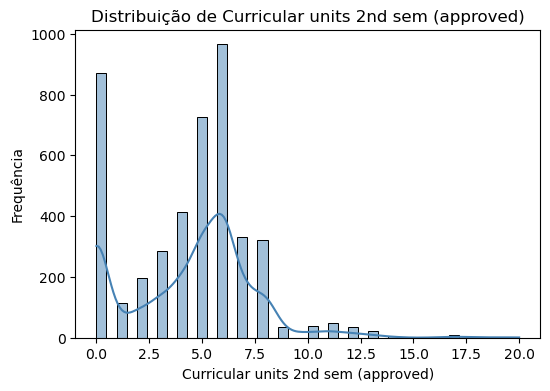

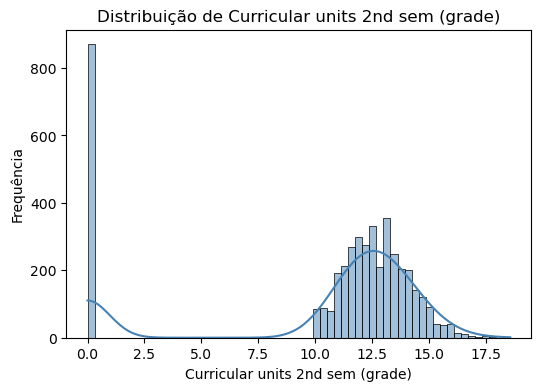

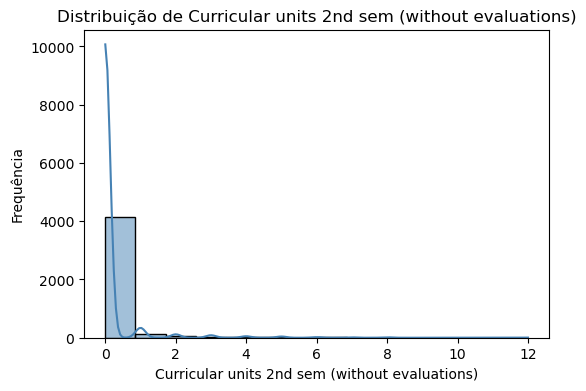

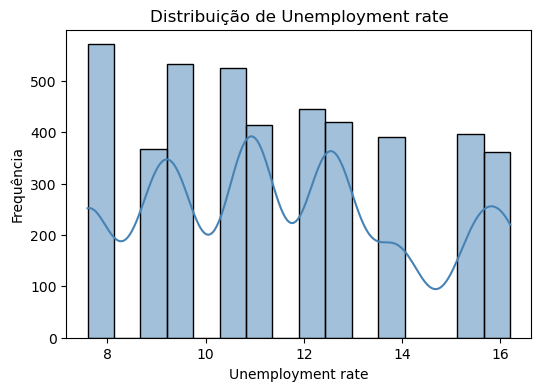

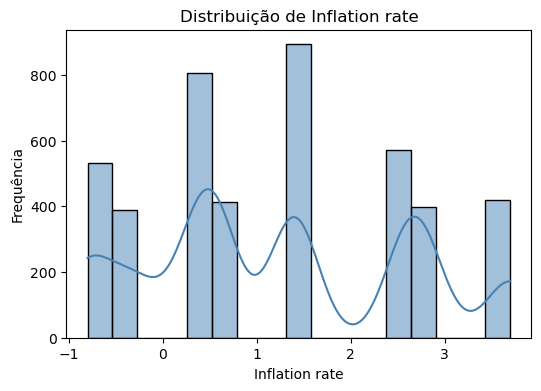

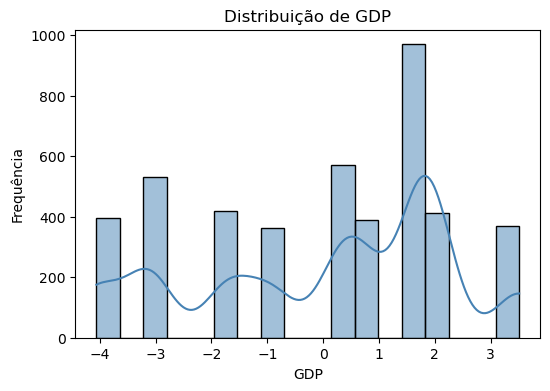

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.drop(columns=['Target']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()


MARKDOWN CÉLULAS 1, 2 E 3:


Agora analisaremos a tabela resultado da função describe de maneira mais completa do que o feito no dia 1, estaremos focando em analisar o seguinte:

PONTO 1:
Se a media e mediana estao muito distantes => indicam que a distribuição é assimétrica: 


| Relação entre média e mediana              | Tipo de assimetria     | Grau             |
| ------------------------------------------ | ---------------------- | ---------------- |
| Média ≈ Mediana (diferença < 10% da média) | Simétrica              | 🟢 Baixa/nenhuma |
| Média > Mediana (diferença ≥ 10% da média) | Assimétrica à direita  | 🟠 Moderada      |
| Média < Mediana (diferença ≥ 10% da média) | Assimétrica à esquerda | 🟠 Moderada      |
| Diferença ≥ 20% da média                   | Fortemente assimétrica | 🔴 Alta          |

PONTO 2:
O desvio padrão também sera considerado de forma que:

O desvio padrão sera analisado por meio do CV, este é calculado da seguinte forma:
CV = std/mean
Os valores serão classificados/considerados baixos, moderados, altos ou extremamente altos seguindo a lógica a seguir:

| CV (std / mean)        | Grau de dispersão | Interpretação                                           |
| ---------------------- | ----------------- | ------------------------------------------------------- |
|   < 0.15 (15%)         | Baixa             | Valores concentrados, pouca variação                    |
|   0.15–0.30 (15–30%)   | Moderada          | Variação normal, natural                                |
|   > 0.30 (30%)         | Alta              | Dados muito espalhados, possível assimetria ou outliers |
|   > 1.00 (100%)        | Extremamente alta | Provável presença de outliers ou escala muito ampla     |


PONTO 3:
os histogramas feitos na celula 3 tem o propósito de auxiliar visualmente a identificação de padrões e observações colocadas no ponto 1 e ponto 2.

FIM DA ANÁLISE UNIVARIADA

................................................................................................................................................................................................................................................................



ANÁLISE BIVARIADA:
Nessa etapa procurarei analisar os comportamentos das variaveis numéricas quando comparadas entre si e o comportamento de cada variavel em conjunto com a variavel Target. Dessa forma, pretendo conseguir resultados que demostrem correlações entre variaveis númericas e descobrir quais variáveis mais se relacionam com a evasão


PARTE 1: Compração das variaveis entre si:

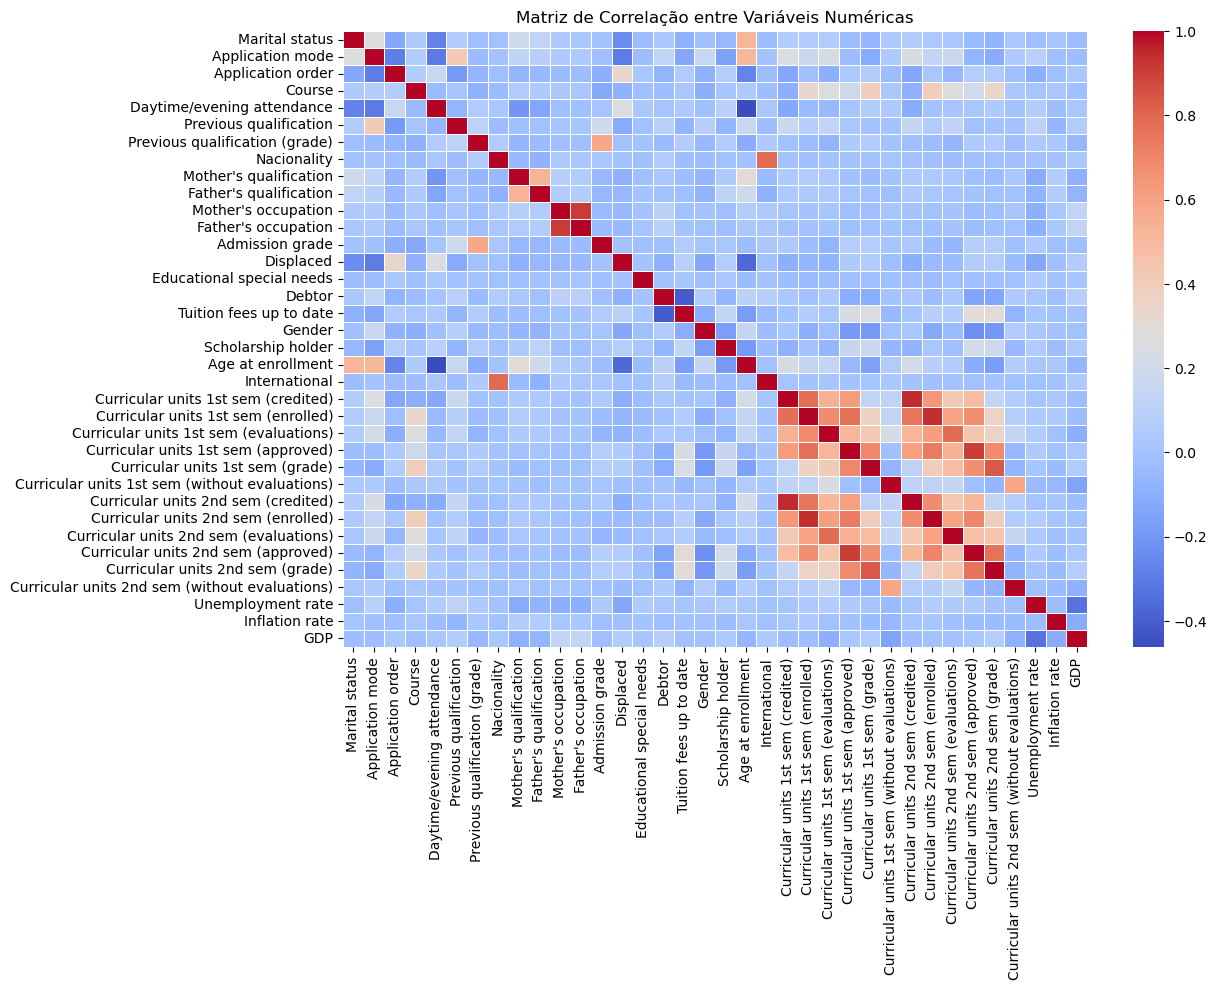

In [22]:
#correlação entre variaveis numericas
import matplotlib.pyplot as plt
import seaborn as sns

# Limpa os nomes das colunas de espaços/tabulações extras nas bordas
df.columns = df.columns.str.strip()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


In [23]:
#listando correlações fortes (acima de 0.7)
corr_matrix = df.corr().abs()
strong_corr = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
strong_corr.columns = ['Var1', 'Var2', 'Correlação']
strong_corr = strong_corr[strong_corr['Correlação'] > 0.7].sort_values(by='Correlação', ascending=False)

display(strong_corr)


,Var1,Var2,Correlação
530,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),0.944811
544,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.942627
305,Mother's occupation,Father's occupation,0.910472
569,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.904002
580,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.837170
236,Nacionality,International,0.790935
557,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),0.778863
525,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),0.774344
540,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),0.769083
615,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),0.760804


PARTE 2: Busca de relação de cada variável com a evasão ( Target )

In [24]:

# CONVERSÃO DO TARGET PARA FORMATO BINÁRIO

# 1 = Dropout (evadido)
# 0 = Enrolled ou Graduate (não evadido)
#OBS:Essa abordagem foi escolhida por facilitar as estatisticas e ainda conservar o serne da questão quem evadiu(1) de quem não evadiu (0)

df['Target_bin'] = df['Target'].map({
    'Dropout': 1,
    'Graduate': 0,
    'Enrolled': 0
})

# Verificando a distribuição da variável alvo binária
print("Distribuição do Target binário:")
display(df['Target_bin'].value_counts(normalize=True) * 100)


Distribuição do Target binário:


0    67.879747
1    32.120253
Name: Target_bin, dtype: float64

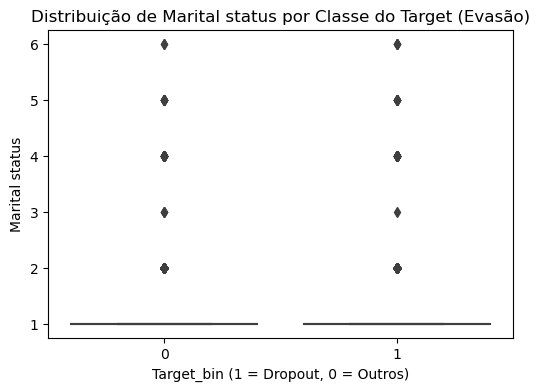

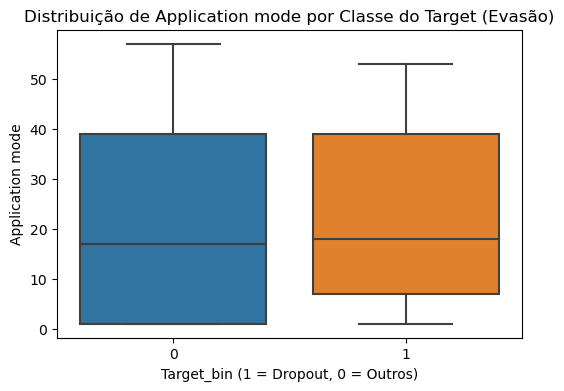

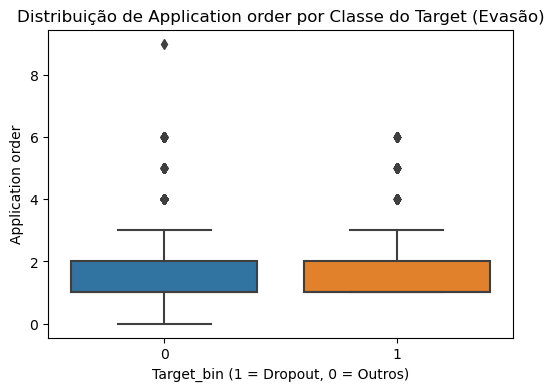

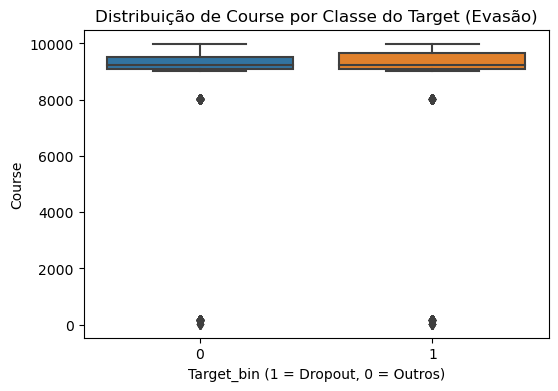

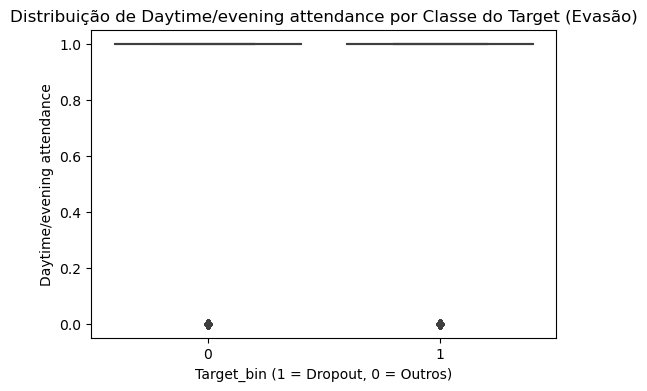

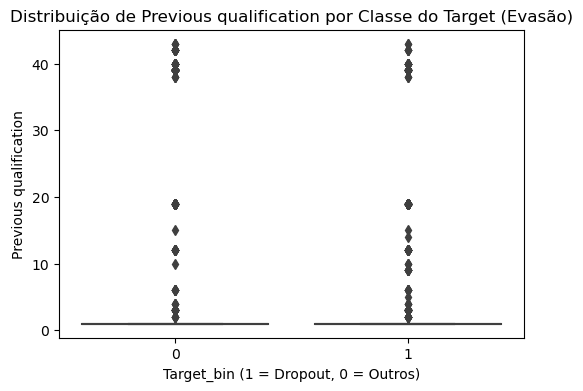

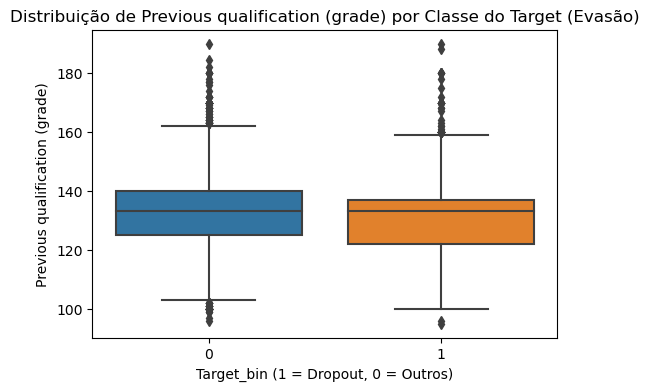

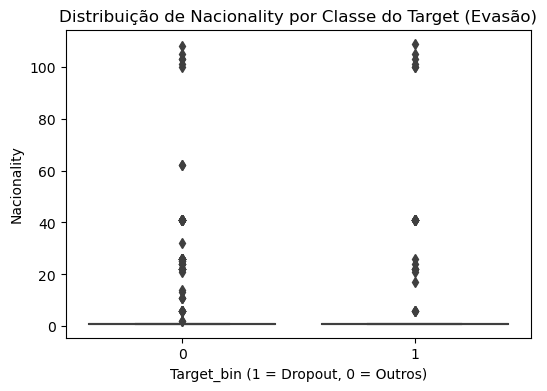

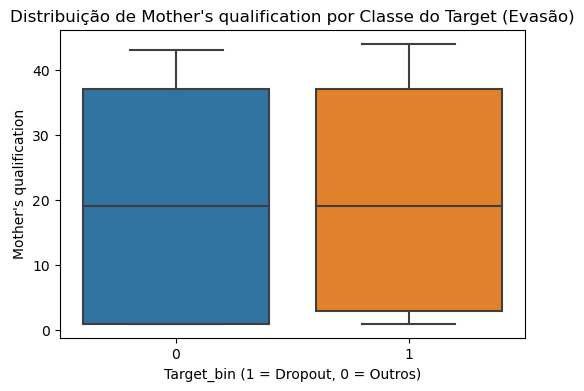

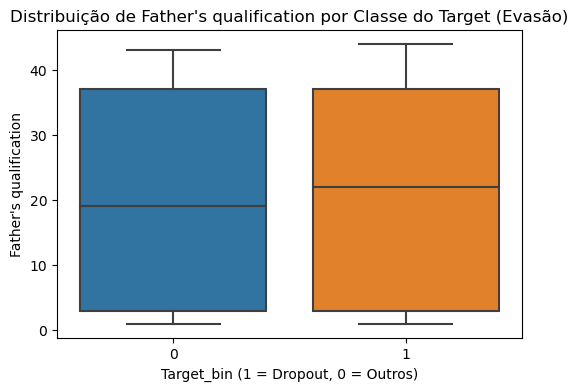

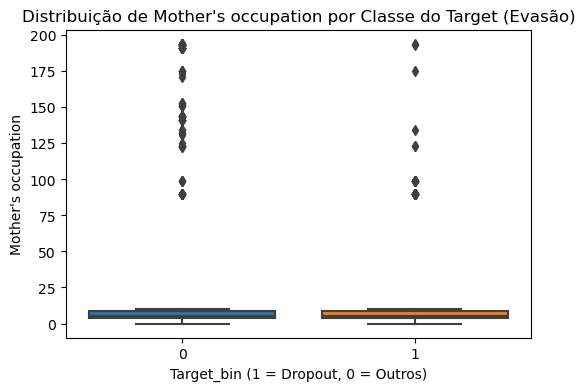

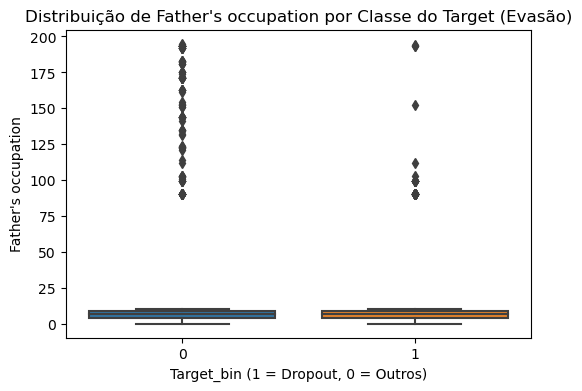

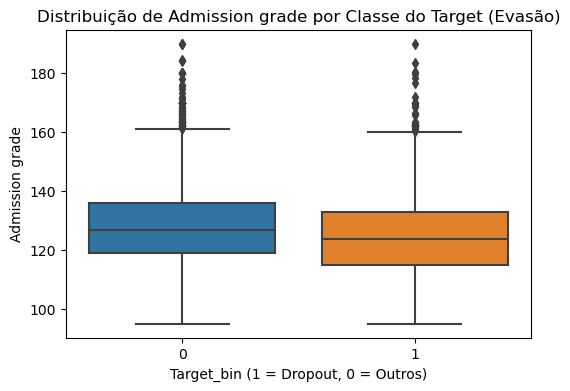

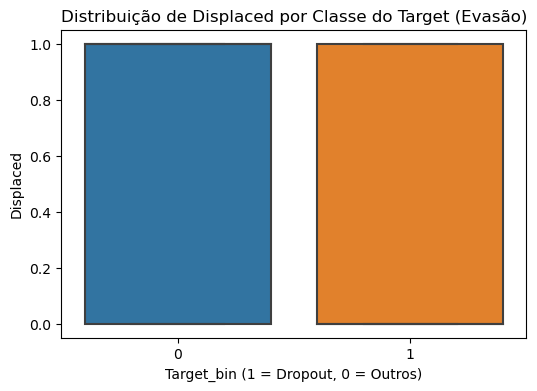

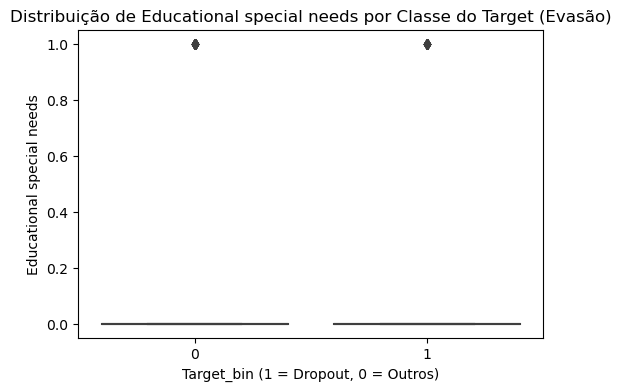

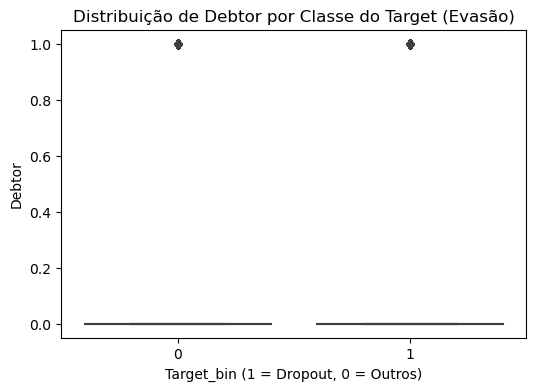

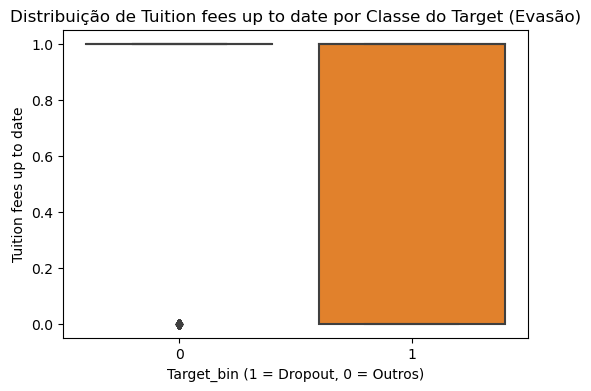

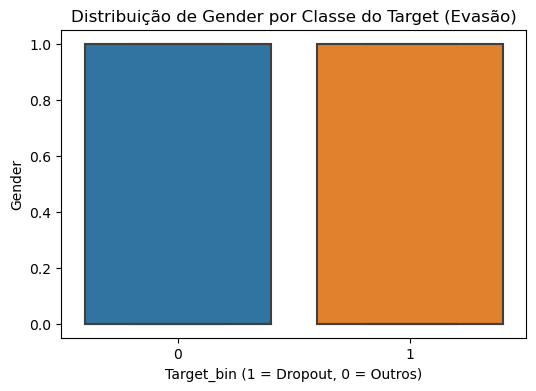

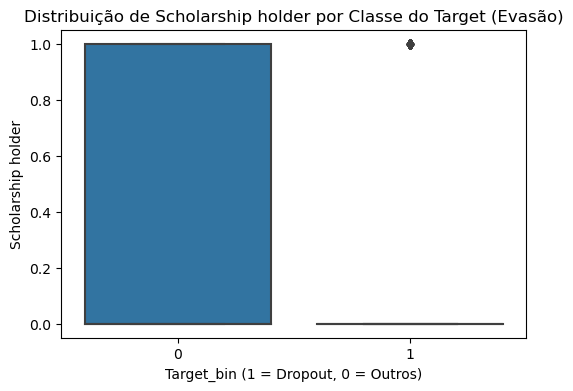

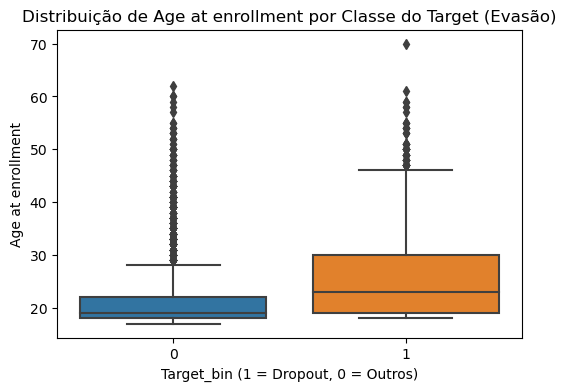

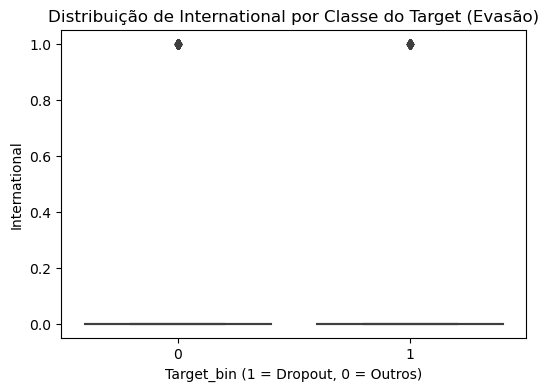

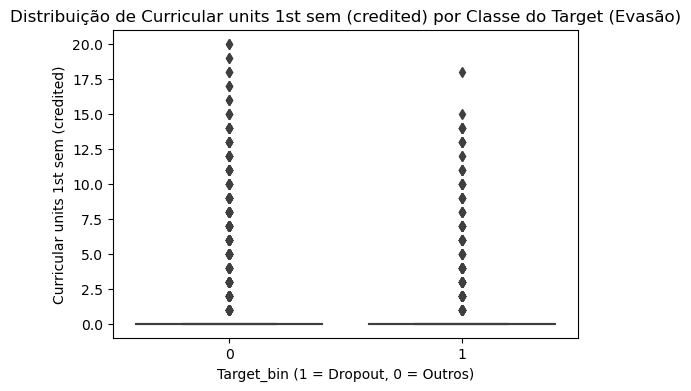

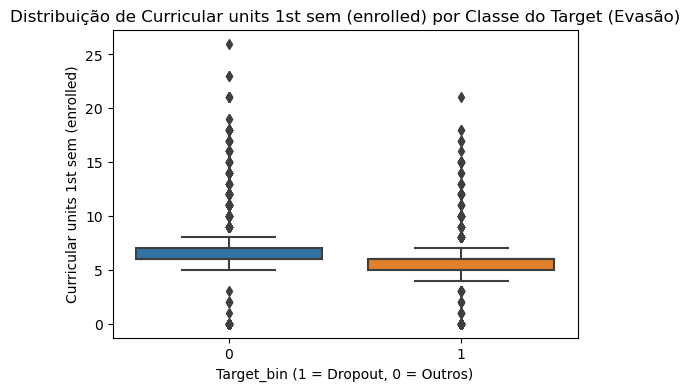

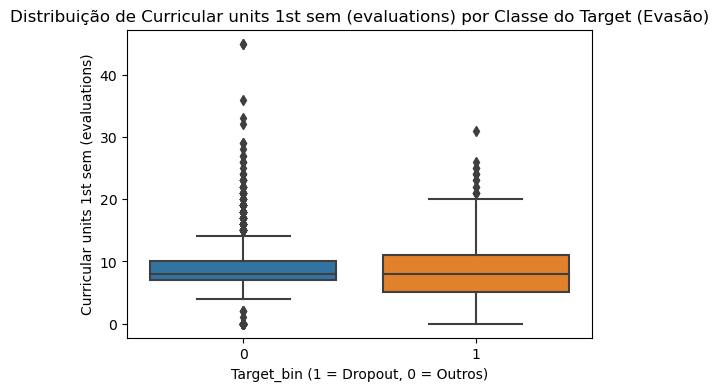

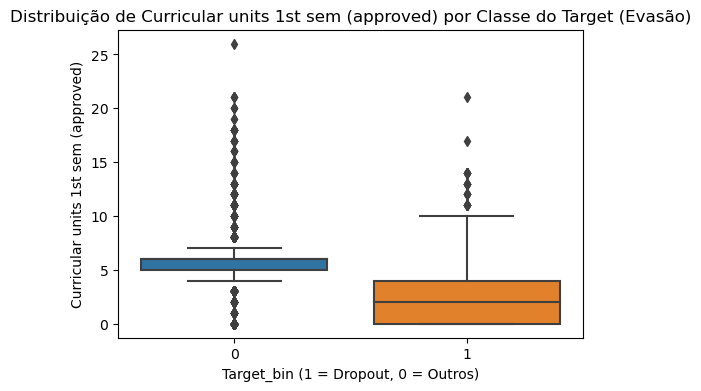

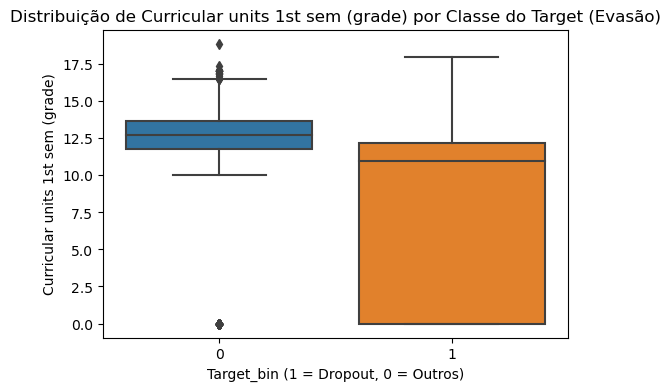

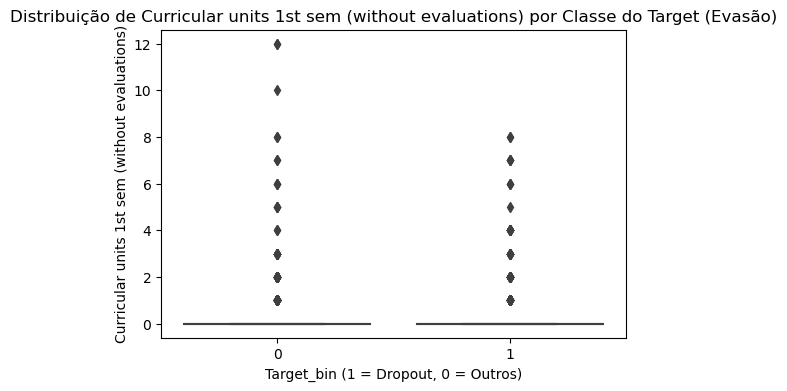

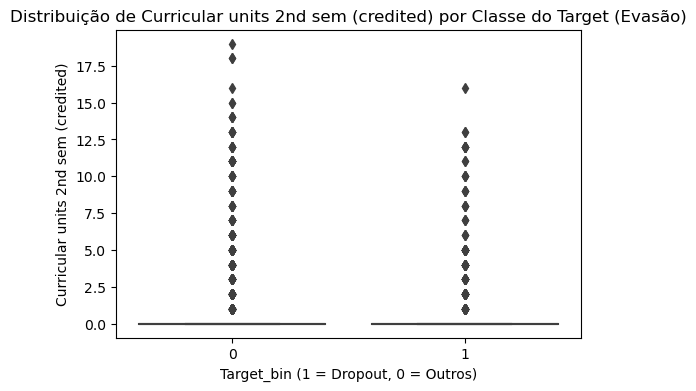

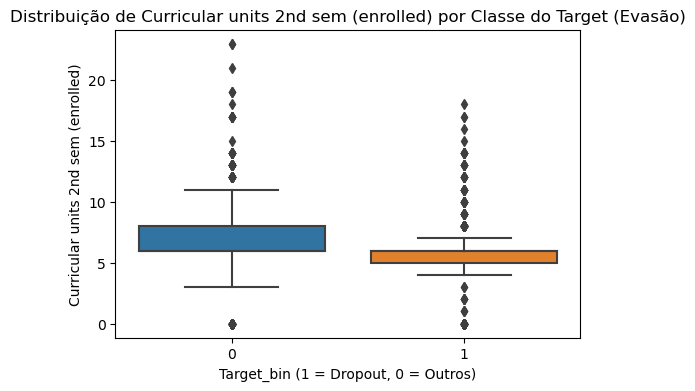

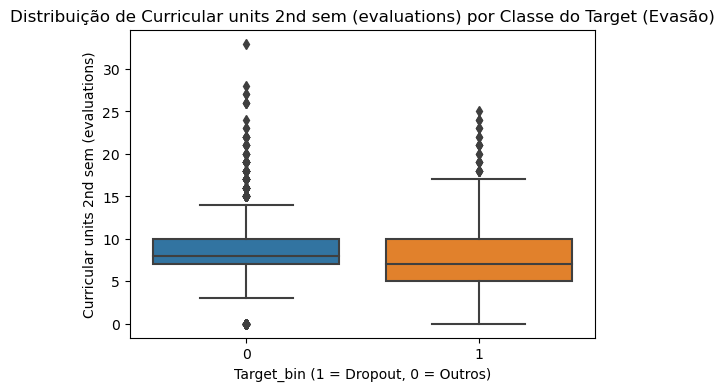

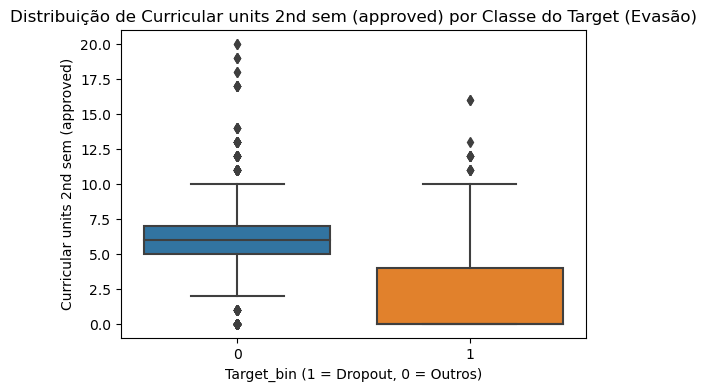

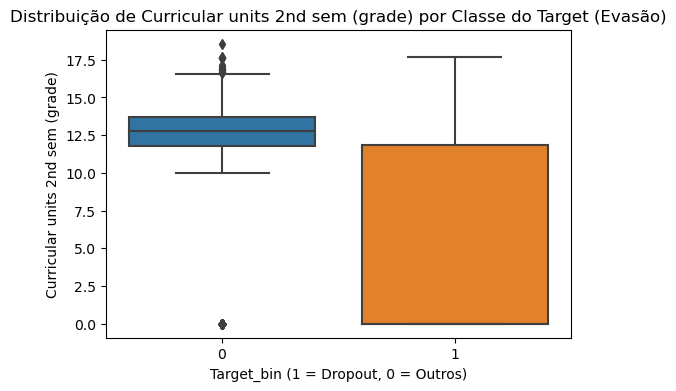

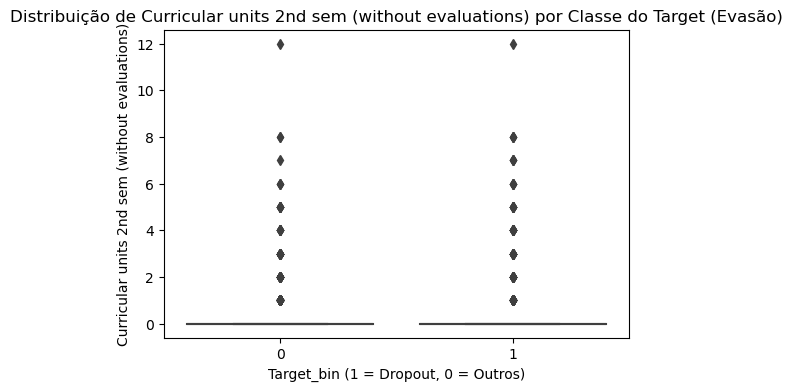

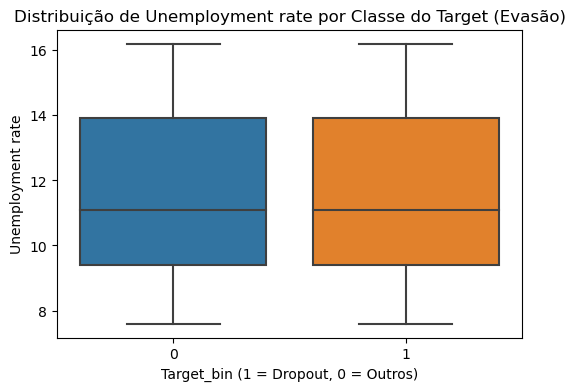

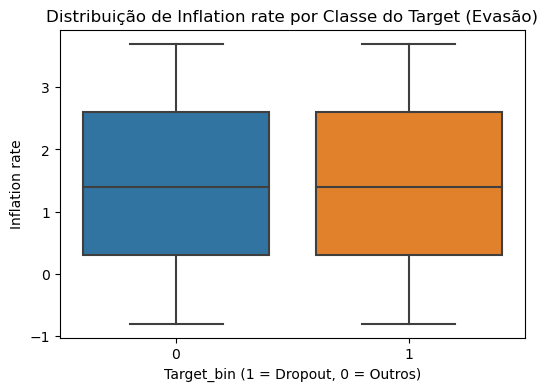

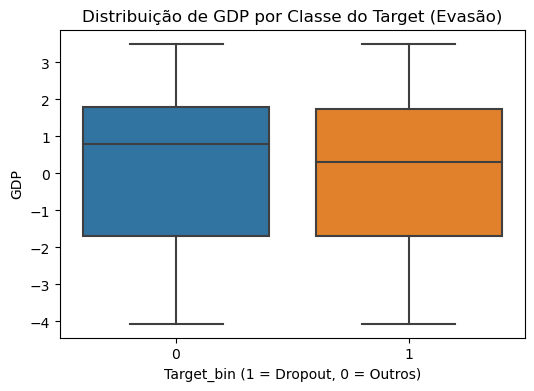

In [25]:

# BOXLOTS DAS VARIÁVEIS POR TARGET

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.drop(columns=['Target', 'Target_bin']).columns  # apenas variáveis numéricas

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Target_bin', y=col, data=df)
    plt.title(f'Distribuição de {col} por Classe do Target (Evasão)')
    plt.xlabel('Target_bin (1 = Dropout, 0 = Outros)')
    plt.ylabel(col)
    plt.show()
    
    
#Se as medianas ou a amplitude forem bem diferentes entre 0 e 1,
#→ a variável ajuda a distinguir os grupos (provável relevância).

#Distribuições muito parecidas → variável menos útil para o modelo.

In [26]:

# COMPARAÇÃO DE MÉDIAS ENTRE AS CLASSES

comparacao = df.groupby('Target_bin').mean().T
comparacao['Diferença (%)'] = ((comparacao[1] - comparacao[0]) / comparacao[0]) * 100

# Ordenar pela maior diferença (absoluta)
comparacao = comparacao.sort_values(by='Diferença (%)', key=abs, ascending=False)

display(comparacao.round(2))

#Variáveis com grandes diferenças percentuais entre as médias dos dois grupos
#→ provavelmente mais relacionadas com a evasão.


Target_bin,0,1,Diferença (%)
GDP,0.07,-0.15,-303.08
Debtor,0.06,0.22,245.21
Curricular units 2nd sem (without evaluations),0.11,0.24,118.44
Gender,0.28,0.49,73.27
Curricular units 1st sem (without evaluations),0.11,0.19,71.71
Scholarship holder,0.32,0.09,-70.65
Curricular units 2nd sem (approved),5.62,1.94,-65.46
Curricular units 1st sem (approved),5.73,2.55,-55.44
Curricular units 2nd sem (grade),12.28,5.90,-51.96
Application mode,16.28,23.71,45.64


In [27]:

# CORRELAÇÃO PONTO-BISSERIAL COM O TARGET

from scipy.stats import pointbiserialr
import pandas as pd

correlacoes = []
for col in num_cols:
    corr, pval = pointbiserialr(df[col], df['Target_bin'])
    correlacoes.append({'Variável': col, 'Correlação': corr, 'p-valor': pval})

corr_df = pd.DataFrame(correlacoes).sort_values(by='Correlação', key=abs, ascending=False)

display(corr_df)

#Correlação próxima de 1 → variável aumenta com maior chance de evasão.
#Correlação próxima de -1 → variável diminui com maior chance de evasão.
#p-valor < 0.05 → relação estatisticamente significativa.


,Variável,Correlação,p-valor
31,Curricular units 2nd sem (grade),-0.571792,0.000000e+00
30,Curricular units 2nd sem (approved),-0.569500,0.000000e+00
25,Curricular units 1st sem (grade),-0.480669,1.338717e-254
24,Curricular units 1st sem (approved),-0.479112,9.826703e-253
16,Tuition fees up to date,-0.429149,9.862491e-198
19,Age at enrollment,0.254215,3.322722e-66
18,Scholarship holder,-0.245354,1.176632e-61
15,Debtor,0.229407,6.367416e-54
17,Gender,0.203983,9.085401e-43
1,Application mode,0.198458,1.567256e-40


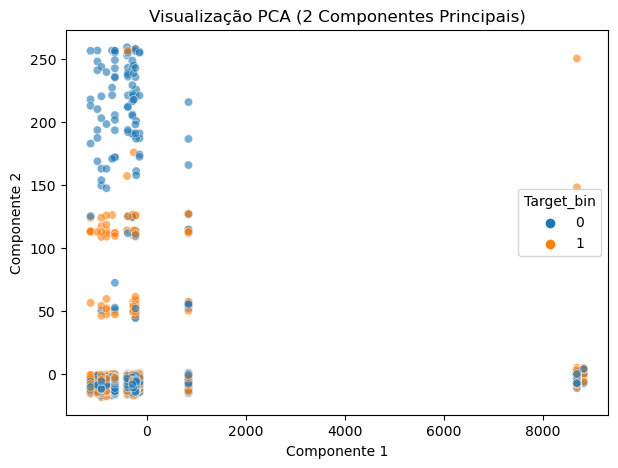

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecionando apenas as variáveis numéricas
X = df.drop(columns=['Target', 'Target_bin'])
pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.figure(figsize=(7,5))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=df['Target_bin'], alpha=0.6)
plt.title('Visualização PCA (2 Componentes Principais)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()



CONCLUSÕES PARCIAIS DA ANÁLISE BIVARIADA:

-Algumas variaveis apresentam fortes correlações entre si, dessa forma não faz sentido manter todas elas na análise uma seleção sera feita

-Algumas variaveis não apresentam forte correlação com o alvo Target, que representa o estado de matricula ou evasão do aluno. Portanto, essas variaveis não agregam na classificação preditiva, logo serao desconsideradas

-Um conjunto de 13 variaveis foi selecionado, esse conjunto apresenta variaveis com alta relação à Target e não possui variaveis com alta correlação entre si para evitar redundancias e ruídos 

-As variáveis selecionadas foram:
Curricular units 2nd sem (grade)	
Curricular units 2nd sem (approved)	
Tuition fees up to date	
Age at enrollment	
Scholarship holder	
Debtor	
Gender	
Application mode
Displaced	
Admission grade	
Marital status
Daytime/evening attendance
Mother's qualification



FIM DA ANÁLISE BIVARIADA E EDA

PRÉ PROCESSAMENTO
Nessa etapa as variaveis selecionadas por meio da EDA foram analisadas separadamente para verificar quais tecnicas de pré-processamento serão aplicadas em cada uma delas, com a finalidade de construir um conjunto de dados processado que facilite a aplicação dos modelos de machine learning nas etapas futuras desse projeto

In [29]:

# SEPARAÇÃO DAS VARIÁVEIS PREDITIVAS E DO TARGET

features = [
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Tuition fees up to date',
    'Age at enrollment',
    'Scholarship holder',
    'Debtor',
    'Gender',
    'Application mode',
    'Displaced',
    'Admission grade',
    'Marital status',
    'Daytime/evening attendance',
    "Mother's qualification"
]

X = df[features].copy()
y = df['Target_bin']


In [30]:

# DEFINIÇÃO DOS GRUPOS DE VARIÁVEIS


# Variáveis que receberão PowerTransformer (assimétricas moderadas)
power_vars = [
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Age at enrollment',
    'Marital status'
]

# Variáveis que receberão StandardScaler
standard_vars = [
    'Application mode',
    'Admission grade',
    "Mother's qualification"
]

# Variáveis binárias (mantidas como estão)
binary_vars = [
    'Tuition fees up to date',
    'Scholarship holder',
    'Debtor',
    'Gender',
    'Displaced',
    'Daytime/evening attendance'
]


In [31]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

# Copiar X para não sobrescrever
X_scaled = X.copy()

# Aplicar PowerTransformer (corrige assimetria leve/moderada)
pt = PowerTransformer(method='yeo-johnson')
X_scaled[power_vars] = pt.fit_transform(X_scaled[power_vars])

# Aplicar StandardScaler (para variáveis simétricas)
sc = StandardScaler()
X_scaled[standard_vars] = sc.fit_transform(X_scaled[standard_vars])

# As binárias permanecem inalteradas


In [32]:

# VERIFICAÇÃO DO PRÉ-PROCESSAMENTO

import numpy as np
import pandas as pd

display(X_scaled.describe().T)

#Essa celula serve para que voce possa observar o resultado do pré processamento
#Você deve ver que as variáveis tratadas agora têm média próxima de 0 e desvio padrão ≈ 1,
#enquanto as binárias permanecem como 0 e 1.

,count,mean,std,min,25%,50%,75%,max
Curricular units 2nd sem (grade),4424.0,3.202180e-17,1.000113,-1.902454,-0.060142,0.312244,0.619541,2.210739
Curricular units 2nd sem (approved),4424.0,9.237638e-17,1.000113,-1.591908,-0.745059,0.263542,0.565695,4.050092
Tuition fees up to date,4424.0,8.806510e-01,0.324235,0.000000,1.000000,1.000000,1.000000,1.000000
Age at enrollment,4424.0,-2.096461e-11,1.000113,-1.804431,-0.635746,-0.226299,0.923104,1.904117
Scholarship holder,4424.0,2.484177e-01,0.432144,0.000000,0.000000,0.000000,0.000000,1.000000
Debtor,4424.0,1.136980e-01,0.317480,0.000000,0.000000,0.000000,0.000000,1.000000
Gender,4424.0,3.517179e-01,0.477560,0.000000,0.000000,0.000000,1.000000,1.000000
Application mode,4424.0,-2.380179e-16,1.000113,-1.010660,-1.010660,-0.095470,1.162916,2.192505
Displaced,4424.0,5.483725e-01,0.497711,0.000000,0.000000,1.000000,1.000000,1.000000
Admission grade,4424.0,-9.557354e-16,1.000113,-2.208378,-0.626926,-0.060642,0.540172,4.352230


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (3539, 13)
Tamanho do conjunto de teste: (885, 13)


In [34]:

# SALVANDO OS CONJUNTOS DE DADOS TRATADOS
# IMPORTANTE PARA REUTILIZARMOS FUTURAMENTE

# X_scaled e y completos
X_scaled.to_csv('X_scaled.csv', index=False)
y.to_csv('y.csv', index=False)

# Conjuntos de treino e teste
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Arquivos CSV salvos com sucesso na pasta do projeto!")


Arquivos CSV salvos com sucesso na pasta do projeto!
